In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
from sklearn.metrics import log_loss, confusion_matrix, accuracy_score,classification_report, roc_curve,auc

In [2]:
df = pd.read_csv('data_org.csv', low_memory = False)

In [3]:
#df['Default'] = np.where(df['DefaultInd'] == 0, 1, 0)

In [4]:
list(df.columns)

['LoanSequenceNumber',
 'CreditScore',
 'FirstTimeHomebuyerFlag',
 'MI',
 'NumberUnits',
 'OccupancyStatus',
 'OriginalCLTV',
 'OriginalDTI',
 'OriginalUPB',
 'OriginalLTV',
 'OriginalInterestRate',
 'AmortizationType',
 'PropertyState',
 'LoanPurpose',
 'OriginalLoanTerm',
 'InterestOnlyIndicator',
 'Year',
 'MaxDefault',
 'DefaultInd',
 'Default']

In [5]:
df.head()

,LoanSequenceNumber,CreditScore,FirstTimeHomebuyerFlag,MI,NumberUnits,OccupancyStatus,OriginalCLTV,OriginalDTI,OriginalUPB,OriginalLTV,OriginalInterestRate,AmortizationType,PropertyState,LoanPurpose,OriginalLoanTerm,InterestOnlyIndicator,Year,MaxDefault,DefaultInd,Default
0,F22Q10000012,768,N,0,1,P,57,28,95000,57,2.625,FRM,NY,N,180,N,2022,0.0,2,0
1,F22Q10000178,781,N,0,1,S,80,44,260000,80,3.125,FRM,NY,P,360,N,2022,0.0,2,0
2,F22Q10000180,805,N,0,1,P,50,34,190000,50,3.125,FRM,WI,C,360,N,2022,0.0,2,0
3,F22Q10000368,661,N,0,1,P,48,42,150000,48,3.375,FRM,IN,C,360,N,2022,0.0,2,0
4,F22Q10000392,668,Y,0,1,P,80,40,194000,80,3.875,FRM,NE,P,360,N,2022,0.0,2,0


In [6]:
df.shape

(1025000, 20)

In [7]:
df.loc[(df['Default'] == 1)]

,LoanSequenceNumber,CreditScore,FirstTimeHomebuyerFlag,MI,NumberUnits,OccupancyStatus,OriginalCLTV,OriginalDTI,OriginalUPB,OriginalLTV,OriginalInterestRate,AmortizationType,PropertyState,LoanPurpose,OriginalLoanTerm,InterestOnlyIndicator,Year,MaxDefault,DefaultInd,Default
159,F22Q10007696,768,Y,0,1,P,80,49,412000,80,2.893,FRM,FL,P,360,N,2022,5.0,0,1
1780,F22Q10082555,743,Y,30,1,P,95,38,337000,95,3.250,FRM,GA,P,360,N,2022,3.0,0,1
2229,F22Q10104574,711,N,0,1,P,76,41,189000,76,2.750,FRM,TX,N,240,N,2022,3.0,0,1
2794,F22Q10132114,806,N,0,1,P,31,28,300000,31,2.375,FRM,CA,C,180,N,2022,3.0,0,1
3538,F22Q10166392,683,N,25,1,P,95,32,219000,95,4.000,FRM,MD,P,360,N,2022,5.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024728,F10Q40582631,784,N,0,1,P,89,999,97000,77,5.000,FRM,GA,N,360,N,2010,17.0,0,1
1024730,F10Q40582712,670,N,0,1,P,93,999,319000,84,4.750,FRM,TX,N,360,N,2010,111.0,0,1
1024733,F10Q40582745,695,N,0,1,P,107,999,118000,96,5.125,FRM,IL,N,360,N,2010,12.0,0,1
1024827,F10Q40586887,531,N,0,1,P,163,999,65000,37,4.375,FRM,NV,N,120,N,2010,3.0,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025000 entries, 0 to 1024999
Data columns (total 20 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   LoanSequenceNumber      1025000 non-null  object 
 1   CreditScore             1025000 non-null  int64  
 2   FirstTimeHomebuyerFlag  1025000 non-null  object 
 3   MI                      1025000 non-null  int64  
 4   NumberUnits             1025000 non-null  int64  
 5   OccupancyStatus         1025000 non-null  object 
 6   OriginalCLTV            1025000 non-null  int64  
 7   OriginalDTI             1025000 non-null  int64  
 8   OriginalUPB             1025000 non-null  int64  
 9   OriginalLTV             1025000 non-null  int64  
 10  OriginalInterestRate    1025000 non-null  float64
 11  AmortizationType        1025000 non-null  object 
 12  PropertyState           1025000 non-null  object 
 13  LoanPurpose             1025000 non-null  object 
 14  Or

In [9]:
df.dropna(subset=['MaxDefault'], inplace=True)

In [10]:
print(df.describe().T)

                          count           mean            std     min  \
CreditScore           1024973.0     750.706746     255.923007   300.0   
MI                    1024973.0       4.545706      10.272286     0.0   
NumberUnits           1024973.0       1.036102       0.882909     1.0   
OriginalCLTV          1024973.0      72.811971      20.642105     2.0   
OriginalDTI           1024973.0     120.013150     275.330583     1.0   
OriginalUPB           1024973.0  210586.385202  120791.450653  8000.0   
OriginalLTV           1024973.0      71.496214      19.919200     2.0   
OriginalInterestRate  1024973.0       4.756058       1.155766     0.0   
Year                  1024973.0    2011.756146       5.921335  2002.0   
MaxDefault            1024973.0       1.703604      11.472173     0.0   
DefaultInd            1024973.0       1.891613       0.452020     0.0   
Default               1024973.0       0.053841       0.225705     0.0   

                             25%         50%      

In [11]:
print(df.Default.value_counts(normalize=True))

0    0.946159
1    0.053841
Name: Default, dtype: float64


In [12]:
df.isnull().sum().sort_values(ascending=False)

LoanSequenceNumber        0
CreditScore               0
DefaultInd                0
MaxDefault                0
Year                      0
InterestOnlyIndicator     0
OriginalLoanTerm          0
LoanPurpose               0
PropertyState             0
AmortizationType          0
OriginalInterestRate      0
OriginalLTV               0
OriginalUPB               0
OriginalDTI               0
OriginalCLTV              0
OccupancyStatus           0
NumberUnits               0
MI                        0
FirstTimeHomebuyerFlag    0
Default                   0
dtype: int64

In [13]:
categorical_variables = [i for i in df.columns if df[i].dtype == "object"]
print(categorical_variables)

['LoanSequenceNumber', 'FirstTimeHomebuyerFlag', 'OccupancyStatus', 'AmortizationType', 'PropertyState', 'LoanPurpose', 'OriginalLoanTerm', 'InterestOnlyIndicator']


In [14]:
for features in df:
    if (df[features].dtype=="object"):
        print(features,":",df[features].unique())

LoanSequenceNumber : ['F22Q10000012' 'F22Q10000178' 'F22Q10000180' ... 'F10Q40595364'
 'F10Q40595368' 'F10Q40595385']
FirstTimeHomebuyerFlag : ['N' 'Y' '9']
OccupancyStatus : ['P' 'S' 'I']
AmortizationType : ['FRM']
PropertyState : ['NY' 'WI' 'IN' 'NE' 'ME' 'OH' 'WA' 'KS' 'CT' 'TX' 'MI' 'GA' 'MN' 'KY'
 'IL' 'SC' 'VA' 'OR' 'FL' 'OK' 'RI' 'MA' 'MO' 'ID' 'CO' 'AZ' 'MD' 'UT'
 'NJ' 'CA' 'DC' 'NV' 'PA' 'MT' 'MS' 'AR' 'NM' 'NC' 'LA' 'AL' 'NH' 'TN'
 'WV' 'HI' 'IA' 'DE' 'ND' 'SD' 'VT' 'AK' 'PR' 'GU' 'WY' 'VI']
LoanPurpose : ['N' 'P' 'C']
OriginalLoanTerm : ['180' '360' '120' '240' '300' '324' '312' '144' '314' '306' '318' '228'
 '348' '316' '281' '264' '283' '313' '343' '204' '276' '96' '288' '216'
 '336' '179' '168' '317' '359' '331' '339' '158' '275' '342' '346' '121'
 '338' '308' '261' '129' '156' '302' '294' '263' '315' '132' '229' '278'
 '310' '299' '332' '277' '319' '337' '274' '285' '341' '289' '327' '252'
 '298' '297' '350' '138' '334' '255' '143' '330' '169' '347' '328' '102'
 '152' '3

In [15]:
#delete as those have same value for all
df.drop(columns=['InterestOnlyIndicator','AmortizationType'], inplace=True)

In [16]:
df['OriginalLoanTerm'].loc[(df['OriginalLoanTerm'] == '.')] = 0

C:\Users\ksiej\AppData\Local\Temp\ipykernel_13500\1560096475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OriginalLoanTerm'].loc[(df['OriginalLoanTerm'] == '.')] = 0


In [17]:
df['OriginalLoanTerm'] = df['OriginalLoanTerm'].astype(str).astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1024973 entries, 0 to 1024999
Data columns (total 18 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   LoanSequenceNumber      1024973 non-null  object 
 1   CreditScore             1024973 non-null  int64  
 2   FirstTimeHomebuyerFlag  1024973 non-null  object 
 3   MI                      1024973 non-null  int64  
 4   NumberUnits             1024973 non-null  int64  
 5   OccupancyStatus         1024973 non-null  object 
 6   OriginalCLTV            1024973 non-null  int64  
 7   OriginalDTI             1024973 non-null  int64  
 8   OriginalUPB             1024973 non-null  int64  
 9   OriginalLTV             1024973 non-null  int64  
 10  OriginalInterestRate    1024973 non-null  float64
 11  PropertyState           1024973 non-null  object 
 12  LoanPurpose             1024973 non-null  object 
 13  OriginalLoanTerm        1024973 non-null  int32  
 14  Ye

In [19]:
categorical_variables = [i for i in df.columns if df[i].dtype == "object"]
print(categorical_variables)

['LoanSequenceNumber', 'FirstTimeHomebuyerFlag', 'OccupancyStatus', 'PropertyState', 'LoanPurpose']


In [20]:
for features in df:
    if (df[features].dtype=="object"):
        print(features,":",df[features].unique())

LoanSequenceNumber : ['F22Q10000012' 'F22Q10000178' 'F22Q10000180' ... 'F10Q40595364'
 'F10Q40595368' 'F10Q40595385']
FirstTimeHomebuyerFlag : ['N' 'Y' '9']
OccupancyStatus : ['P' 'S' 'I']
PropertyState : ['NY' 'WI' 'IN' 'NE' 'ME' 'OH' 'WA' 'KS' 'CT' 'TX' 'MI' 'GA' 'MN' 'KY'
 'IL' 'SC' 'VA' 'OR' 'FL' 'OK' 'RI' 'MA' 'MO' 'ID' 'CO' 'AZ' 'MD' 'UT'
 'NJ' 'CA' 'DC' 'NV' 'PA' 'MT' 'MS' 'AR' 'NM' 'NC' 'LA' 'AL' 'NH' 'TN'
 'WV' 'HI' 'IA' 'DE' 'ND' 'SD' 'VT' 'AK' 'PR' 'GU' 'WY' 'VI']
LoanPurpose : ['N' 'P' 'C']


In [21]:
continuous_variables = [i for i in df.columns if df[i].dtype != "object"]
continuous_variables.pop()
print(continuous_variables)

['CreditScore', 'MI', 'NumberUnits', 'OriginalCLTV', 'OriginalDTI', 'OriginalUPB', 'OriginalLTV', 'OriginalInterestRate', 'OriginalLoanTerm', 'Year', 'MaxDefault', 'DefaultInd']


**Explanatory Analysis**

In [22]:
total_records = df.shape[0]
print("Total records is {}".format(total_records))
total_default_records = df.loc[(df['DefaultInd'] == 0)]
default_count = total_default_records.shape[0]
print("Total number of default record is: {}".format(default_count))
default_ratio = str(round(default_count/total_records,2))
print("Total default ratio is {}".format(default_ratio))

print("Total records is {}".format(total_records))
total_prepaid_records = df.loc[(df['DefaultInd'] == 1)]
count = total_prepaid_records.shape[0]
print("Total number of prepaid record is: {}".format(count))
prepaid_ratio = str(round(count/total_records,2))
print("Total prepaid ratio is {}".format(prepaid_ratio))

print("Total records is {}".format(total_records))
total_paying_records = df.loc[(df['DefaultInd'] == 2)]
count = total_paying_records.shape[0]
print("Total number of paying record is: {}".format(count))
paying_ratio = str(round(count/total_records,2))
print("Total paying ratio is {}".format(paying_ratio))

Total records is 1024973
Total number of default record is: 55186
Total default ratio is 0.05
Total records is 1024973
Total number of prepaid record is: 722
Total prepaid ratio is 0.0
Total records is 1024973
Total number of paying record is: 969065
Total paying ratio is 0.95


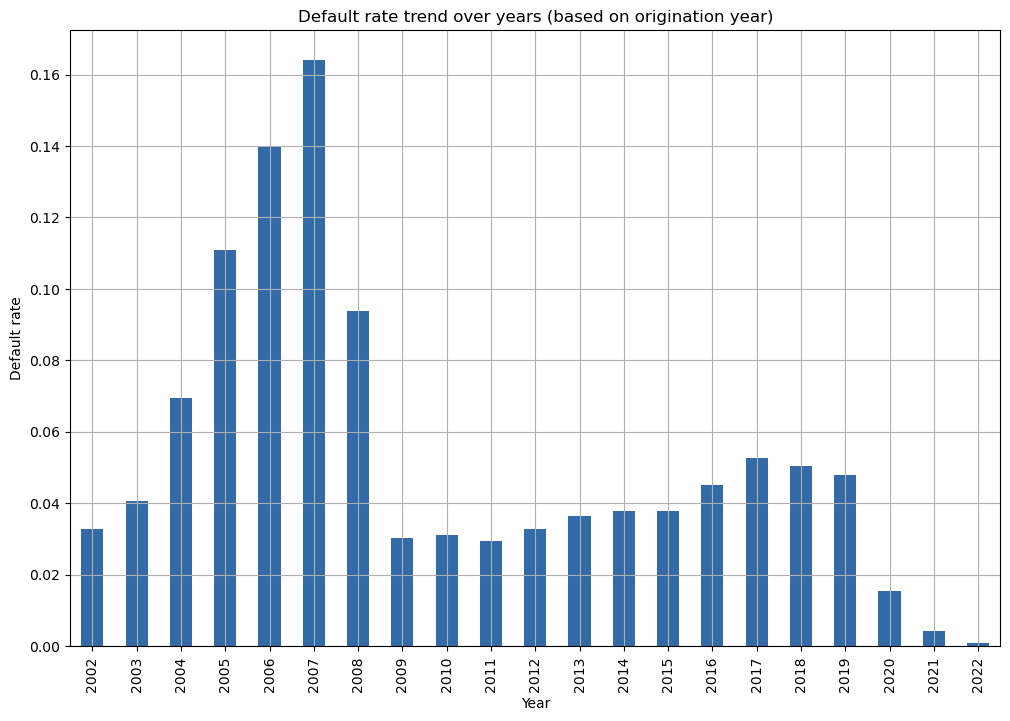

In [23]:
default_year_org = total_default_records.groupby(df['Year'])['LoanSequenceNumber'].count()
total_year_org = df.groupby(df['Year'])['LoanSequenceNumber'].count()
default_year_org.name = "Default Records Number"
total_year_org.name = "Total Records"
default_rate_org_year = pd.concat([default_year_org,total_year_org],axis = 1, join='outer')
default_rate_org_year['DefaultRate'] = default_rate_org_year['Default Records Number']/default_rate_org_year['Total Records']

default_rate_org_year['DefaultRate'].plot(kind='bar', legend=False, color='#326ba8', grid = True, figsize=(12,8),ylabel = "Default rate", title ="Default rate trend over years (based on origination year)")
plt.savefig("Default_org_year.jpg")

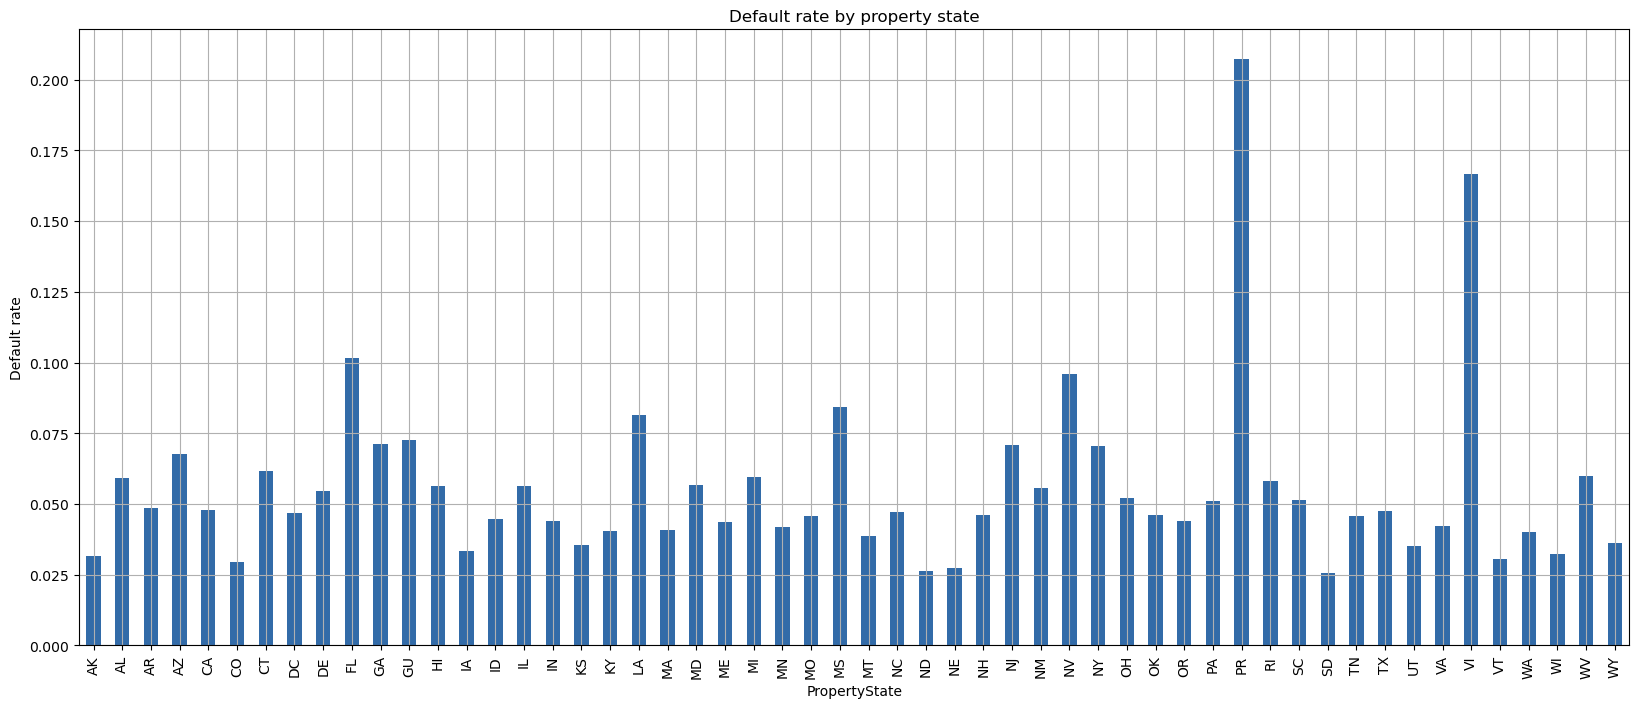

In [24]:
default_state = total_default_records.groupby(df['PropertyState'])['LoanSequenceNumber'].count()
total_default_state = df.groupby(df['PropertyState'])['LoanSequenceNumber'].count()
default_state.name = "Default Records Number"
total_default_state.name = "Total Records"

default_rate_state = pd.concat([default_state,total_default_state],axis = 1, join='outer')

default_rate_state['DefaultRate'] = default_rate_state['Default Records Number']/default_rate_state['Total Records']
default_rate_state['DefaultRate'].plot(kind='bar',grid =True, legend=False, color='#326ba8', figsize=(20,8),ylabel = "Default rate", title ="Default rate by property state")
plt.savefig("Default_state.jpg")

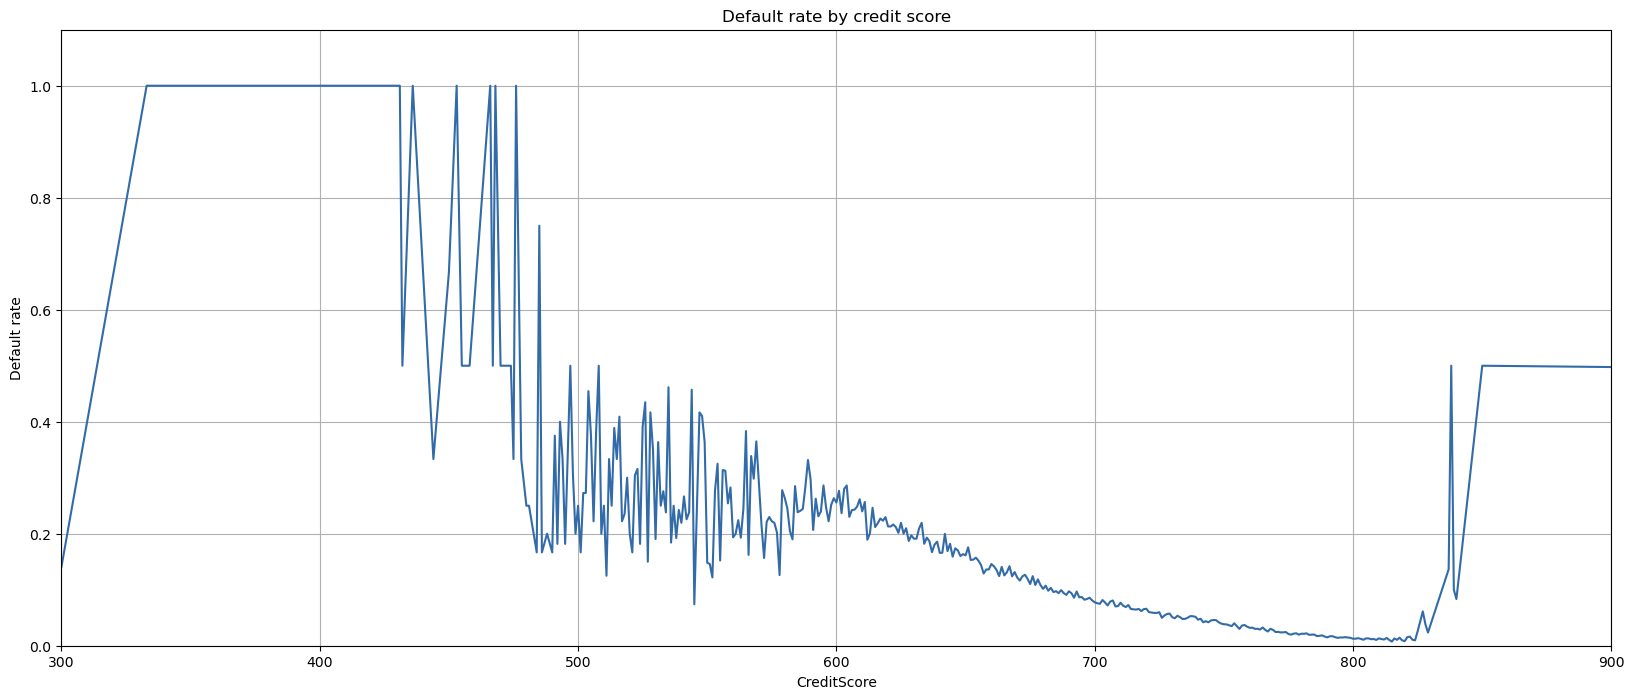

In [25]:
default_credit_score = total_default_records.groupby(df['CreditScore'])['LoanSequenceNumber'].count()
total_default_credit_score = df.groupby(df['CreditScore'])['LoanSequenceNumber'].count()
default_credit_score.name = "Default Records Number"
total_default_credit_score.name = "Total Records"

default_rate_credit_score= pd.concat([default_credit_score,total_default_credit_score],axis = 1, join='outer')

plt.xlim(300,900)
plt.ylim(0,1.1)
default_rate_credit_score['DefaultRate'] = default_rate_credit_score['Default Records Number']/default_rate_credit_score['Total Records']
default_rate_credit_score['DefaultRate'].plot(legend=False, grid =True,  color='#326ba8', figsize=(20,8), ylabel = "Default rate", title ="Default rate by credit score")
plt.savefig("Default_credit_score.jpg")


Text(0.5, 1.0, 'Histogram of Credit scores')

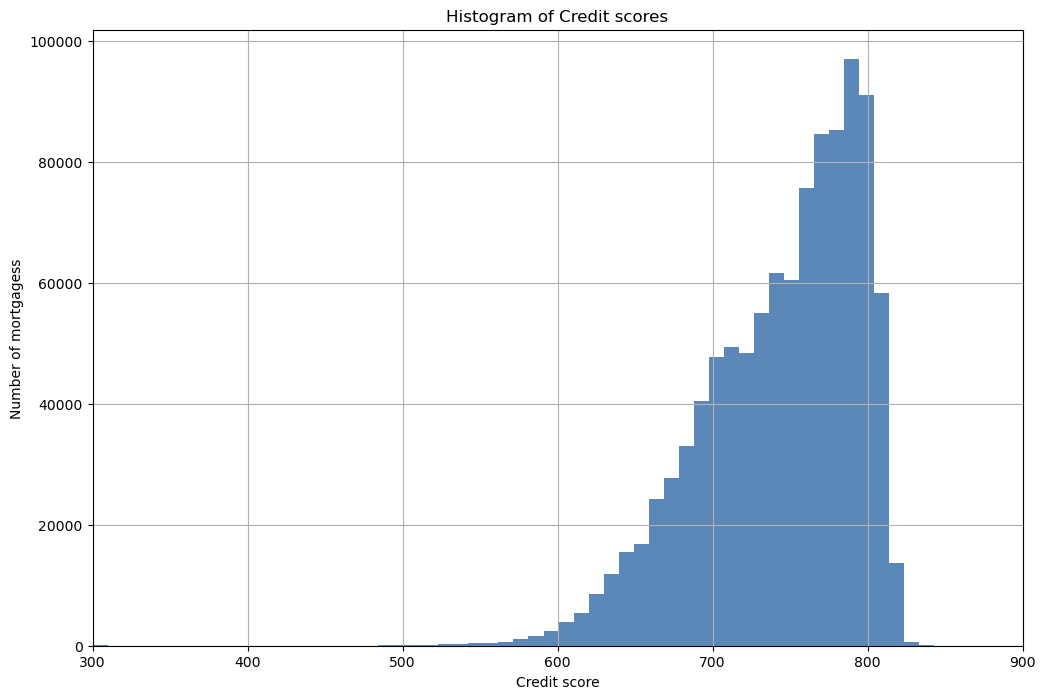

In [26]:
plt.xlim(300,900)
df['CreditScore'].hist(color='#326ba8',bins=1000, figsize=(12,8),alpha=0.8)
plt.xlabel('Credit score')
plt.ylabel("Number of mortgagess")
plt.title("Histogram of Credit scores")
#plt.savefig("Hist_creditscores.jpg")

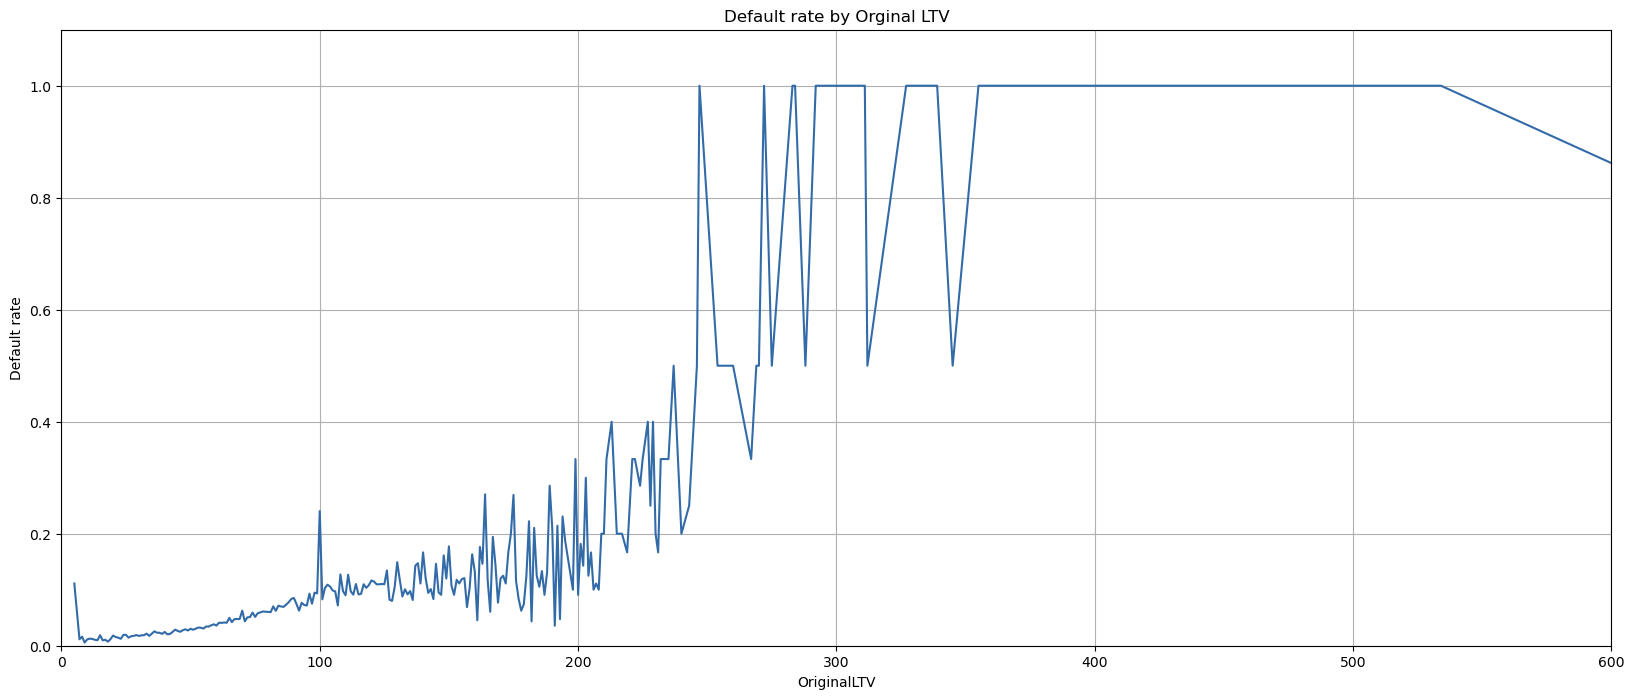

In [27]:
default_LTV = total_default_records.groupby(df['OriginalLTV'])['LoanSequenceNumber'].count()
total_default_LTV = df.groupby(df['OriginalLTV'])['LoanSequenceNumber'].count()
default_LTV.name = "Default Records Number"
total_default_LTV.name = "Total Records"

default_rate_LTV = pd.concat([default_LTV,total_default_LTV],axis = 1, join='outer')
plt.xlim(0,600)
plt.ylim(0,1.1)
default_rate_LTV['DefaultRate'] = default_rate_LTV['Default Records Number']/default_rate_LTV['Total Records']
default_rate_LTV['DefaultRate'].plot(legend=False, grid =True, color='#326ba8', figsize=(20,8),ylabel = "Default rate", title ="Default rate by Orginal LTV")
plt.savefig("Default_credit_score.jpg")

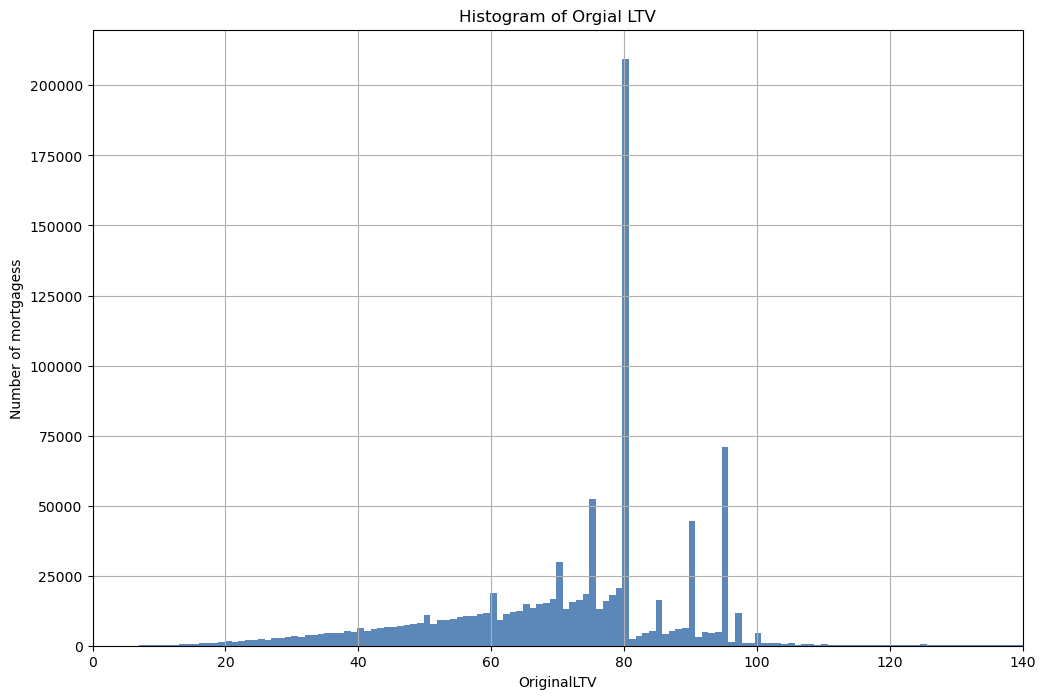

In [28]:
plt.xlim(0,140)
df['OriginalLTV'].hist(color='#326ba8',bins=1000, figsize=(12,8),alpha=0.8)
plt.xlabel('OriginalLTV')
plt.ylabel("Number of mortgagess")
plt.title("Histogram of Orgial LTV")
plt.savefig("Hist_LTV.jpg")

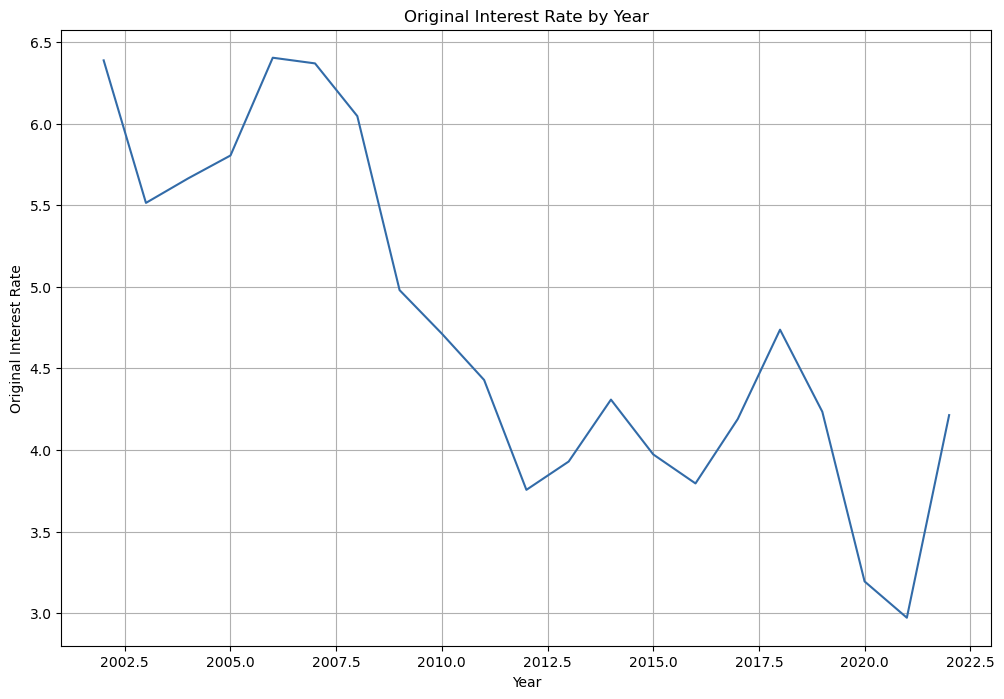

In [29]:
plt.xlabel('Year')
plt.ylabel("Original Interest Rate")
plt.title("Original Interest Rate by Year")
rate_year = df.groupby(df['Year'])['OriginalInterestRate'].mean()
rate_year.plot(title="Original Interest Rate by Year", color='#326ba8', grid = True, figsize=(12,8))
plt.savefig("OIR_year.jpg")

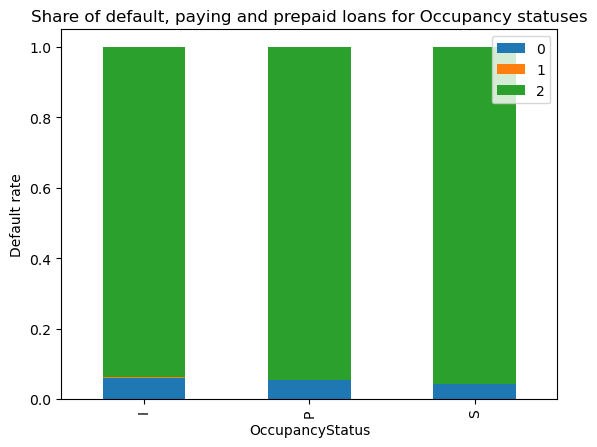

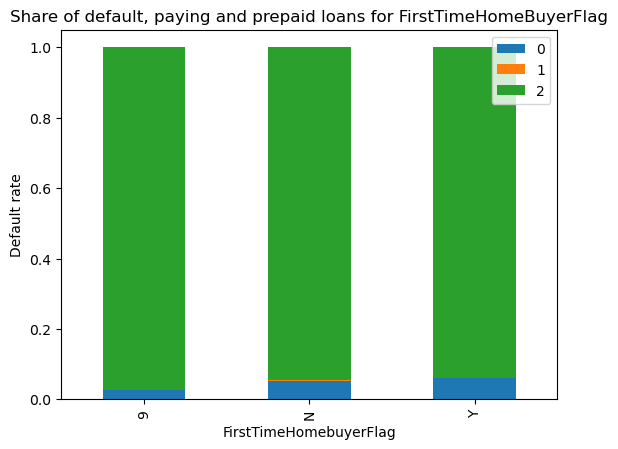

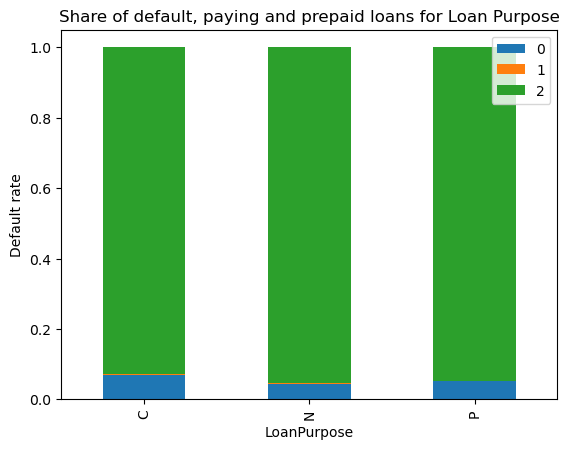

In [30]:
default_occupancy_staus = total_default_records.groupby(df["OccupancyStatus"])['LoanSequenceNumber'].count()
prepaid_occupancy_staus = total_prepaid_records.groupby(df["OccupancyStatus"])['LoanSequenceNumber'].count()
paying_occupancy_staus = total_paying_records.groupby(df["OccupancyStatus"])['LoanSequenceNumber'].count()
total_occupancy_staus = df.groupby(df["OccupancyStatus"])['LoanSequenceNumber'].count()
default_occupancy_staus.name = "default"
prepaid_occupancy_staus.name = "prepaid"
paying_occupancy_staus.name = "paying"
occupancy_staus_ratio = pd.concat([default_occupancy_staus/total_occupancy_staus,prepaid_occupancy_staus/total_occupancy_staus,paying_occupancy_staus/total_occupancy_staus],axis = 1, join='outer')
occupancy_staus_ratio.plot(kind='bar', stacked=True,ylabel = "Default rate", title ="Share of default, paying and prepaid loans for Occupancy statuses" )
plt.savefig("Default_OS.jpg")

default_1st = total_default_records.groupby(df["FirstTimeHomebuyerFlag"])['LoanSequenceNumber'].count()
prepaid_1st  = total_prepaid_records.groupby(df["FirstTimeHomebuyerFlag"])['LoanSequenceNumber'].count()
paying_1st = total_paying_records.groupby(df["FirstTimeHomebuyerFlag"])['LoanSequenceNumber'].count()
total_1st = df.groupby(df["FirstTimeHomebuyerFlag"])['LoanSequenceNumber'].count()
default_1st.name = "default"
prepaid_1st.name = "prepaid"
paying_1st.name = "paying"
first_ratio = pd.concat([default_1st/total_1st,prepaid_1st/total_1st,paying_1st/total_1st],axis = 1, join='outer')
first_ratio.plot(kind='bar', stacked=True, ylabel = "Default rate", title ="Share of default, paying and prepaid loans for FirstTimeHomeBuyerFlag" )
plt.savefig("Default_1st.jpg")

default_LoanPurpose = total_default_records.groupby(df["LoanPurpose"])['LoanSequenceNumber'].count()
prepaid_LoanPurpose  = total_prepaid_records.groupby(df["LoanPurpose"])['LoanSequenceNumber'].count()
paying_LoanPurpose = total_paying_records.groupby(df["LoanPurpose"])['LoanSequenceNumber'].count()
total_LoanPurpose = df.groupby(df["LoanPurpose"])['LoanSequenceNumber'].count()
default_LoanPurpose.name = "default"
prepaid_LoanPurpose.name = "prepaid"
paying_LoanPurpose.name = "paying"
LoanPurpose_ratio = pd.concat([default_LoanPurpose/total_LoanPurpose,prepaid_LoanPurpose/total_LoanPurpose,paying_LoanPurpose/total_LoanPurpose],axis = 1, join='outer')
LoanPurpose_ratio.plot(kind='bar', stacked=True, ylabel = "Default rate", title ="Share of default, paying and prepaid loans for Loan Purpose" )
plt.savefig("Default_LoanPurpose.jpg")

Where:
0 - default;
1 - prepaid;
2 - paying

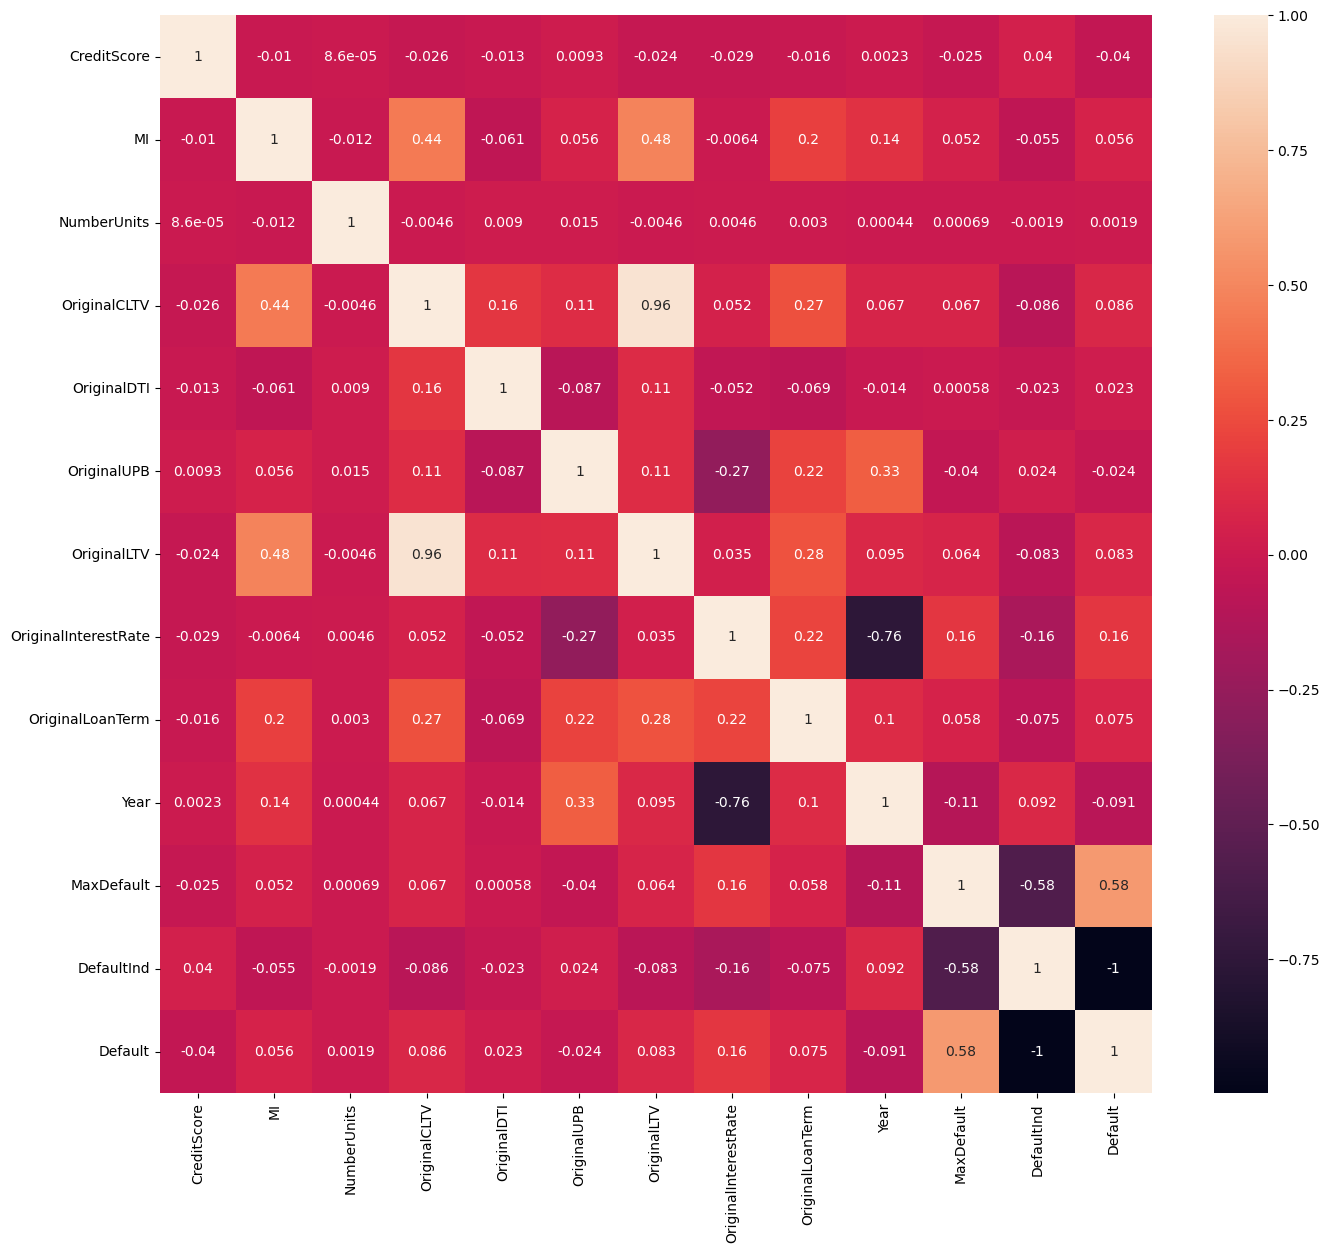

In [31]:
f, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(df.corr(), annot=True)
plt.show()

Droping unused columns LoanSequenceNumber and DefaultInd - as it was created by me to obtain Default column it is highly corelated with Default 

In [32]:
df.drop(columns=['LoanSequenceNumber','DefaultInd'], inplace=True)

In [33]:
le = LabelEncoder()
for feature in df:
    if (df[feature].dtype=="object"):
         df[feature] = le.fit_transform(df[feature])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1024973 entries, 0 to 1024999
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   CreditScore             1024973 non-null  int64  
 1   FirstTimeHomebuyerFlag  1024973 non-null  int32  
 2   MI                      1024973 non-null  int64  
 3   NumberUnits             1024973 non-null  int64  
 4   OccupancyStatus         1024973 non-null  int32  
 5   OriginalCLTV            1024973 non-null  int64  
 6   OriginalDTI             1024973 non-null  int64  
 7   OriginalUPB             1024973 non-null  int64  
 8   OriginalLTV             1024973 non-null  int64  
 9   OriginalInterestRate    1024973 non-null  float64
 10  PropertyState           1024973 non-null  int32  
 11  LoanPurpose             1024973 non-null  int32  
 12  OriginalLoanTerm        1024973 non-null  int32  
 13  Year                    1024973 non-null  int64  
 14  Ma

Traint test split

In [35]:
scaler = StandardScaler()
scaler.fit_transform(df)

array([[ 0.06757213, -0.37151911, -0.44252157, ...,  1.72999144,
        -0.14849887, -0.23854827],
       [ 0.11836868, -0.37151911, -0.44252157, ...,  1.72999144,
        -0.14849887, -0.23854827],
       [ 0.21214693, -0.37151911, -0.44252157, ...,  1.72999144,
        -0.14849887, -0.23854827],
       ...,
       [-0.13170665,  2.68453896, -0.44252157, ..., -0.2965795 ,
        -0.14849887, -0.23854827],
       [ 0.05584985, -0.37151911, -0.44252157, ..., -0.2965795 ,
        -0.14849887, -0.23854827],
       [-0.13170665, -0.37151911, -0.44252157, ..., -0.2965795 ,
        -0.14849887, -0.23854827]])

In [36]:
X = df.drop(['Default'], axis ='columns')
Y = df['Default']

print('Resampled dataset shape %s' % Counter(Y))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

print("train data length:", len(X_train))
print("test data length:", len(X_test))

Resampled dataset shape Counter({0: 969787, 1: 55186})
train data length: 717481
test data length: 307492


Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)

C:\Users\ksiej\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
train score 0.9607975681585993
test score 0.9615046895528989
log-loss: 0.1277212074668823
[[290609    614]
 [ 11223   5046]]
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


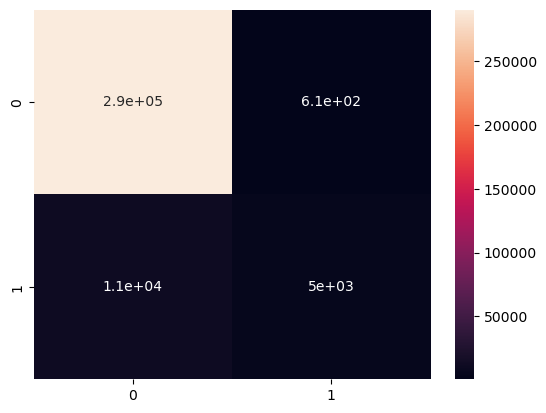

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    291223
           1       0.89      0.31      0.46     16269

    accuracy                           0.96    307492
   macro avg       0.93      0.65      0.72    307492
weighted avg       0.96      0.96      0.95    307492



In [38]:
lg_model = LogisticRegression(C=1.0)
lg_model.fit(X_train ,Y_train)

print("LogisticRegression")
print("train score", lg_model.score(X_train,Y_train))
print("test score", lg_model.score(X_test, Y_test))
print("log-loss:", log_loss(Y_test, lg_model.predict_proba(X_test)))

print(confusion_matrix(Y_test,lg_model.predict(X_test)))
print(lg_model.get_params())
sns.heatmap(confusion_matrix(Y_test,lg_model.predict(X_test)), annot=True)
plt.show()
print(classification_report(Y_test, lg_model.predict(X_test)))

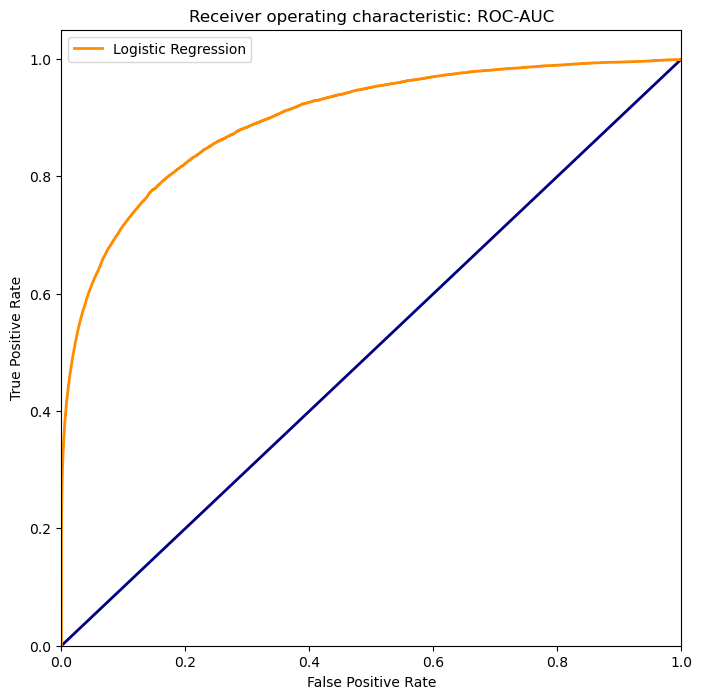

Computed Area Under the Curve (AUC) 0.8979253384823782


In [39]:
fpr,tpr, thresholds = roc_curve(Y_test,lg_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,8))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0,1], [0,1] ,color="navy",lw=2,label="")
plt.plot(fpr, tpr, color="darkorange",lw=2, label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic: ROC-AUC")
plt.legend()
plt.show()
print("Computed Area Under the Curve (AUC)",auc(fpr, tpr))

Random Forest Model

In [40]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,Y_train)
print("Random Forest")
print("train score:",rf_model.score(X_train,Y_train))
print("test score:",rf_model.score(X_test,Y_test))

Random Forest
train score: 1.0
test score: 0.9999512182430762


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    291223
           1       1.00      1.00      1.00     16269

    accuracy                           1.00    307492
   macro avg       1.00      1.00      1.00    307492
weighted avg       1.00      1.00      1.00    307492

[[291208     15]
 [     0  16269]]


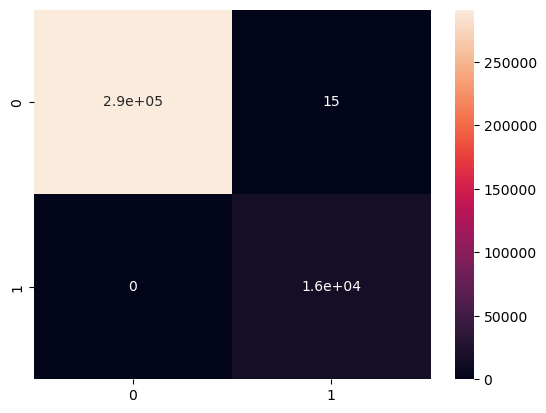

In [41]:
print(classification_report(Y_test, rf_model.predict(X_test)))
print(confusion_matrix(Y_test,rf_model.predict(X_test)))
sns.heatmap(confusion_matrix(Y_test,rf_model.predict(X_test)), annot=True)
plt.show()

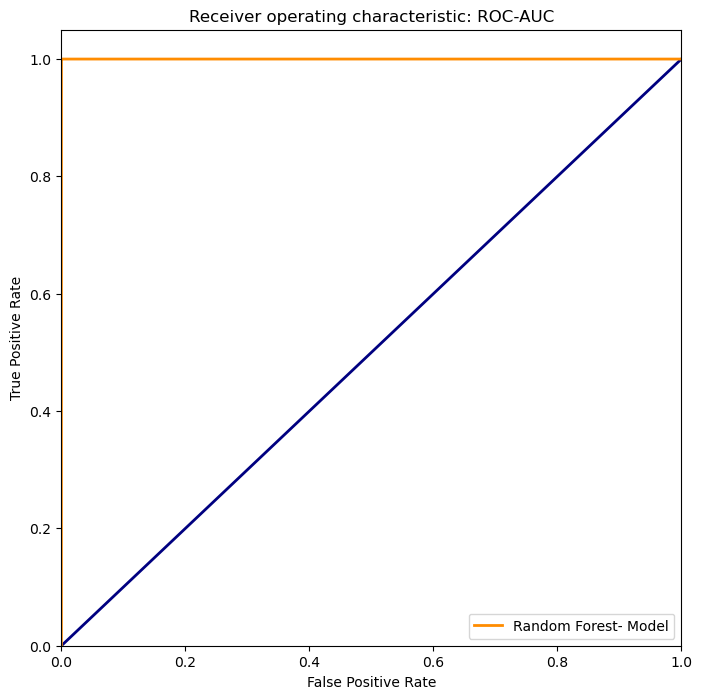

Computed Area Under the Curve (AUC) 0.9999798996687226


In [42]:
fpr, tpr, thresholds = roc_curve(Y_test,rf_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,8))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0,1],[0,1] ,color="navy",lw=2,label="")
plt.plot(fpr,tpr,color="darkorange",lw=2, label="Random Forest- Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic: ROC-AUC")
plt.legend()
plt.show()
print("Computed Area Under the Curve (AUC)",auc(fpr, tpr))

Naive Bayes

Naive Bayes
train score 0.9693343795863584
test score 0.9696512429591664
[[291019    204]
 [  9128   7141]]
{'priors': None, 'var_smoothing': 1e-09}


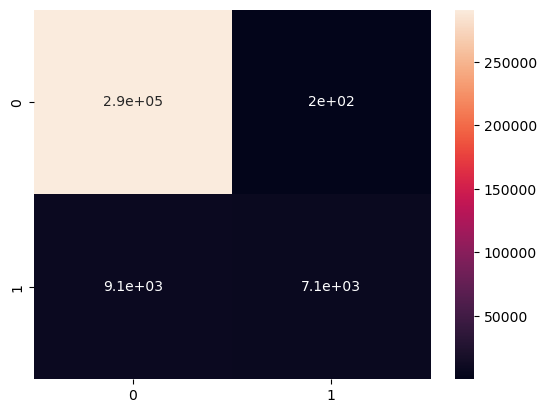

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    291223
           1       0.97      0.44      0.60     16269

    accuracy                           0.97    307492
   macro avg       0.97      0.72      0.79    307492
weighted avg       0.97      0.97      0.96    307492



In [43]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train, Y_train)

print("Naive Bayes")
print("train score", model.score(X_train,Y_train))
print("test score", model.score(X_test, Y_test))

print(confusion_matrix(Y_test,model.predict(X_test)))
print(model.get_params())
sns.heatmap(confusion_matrix(Y_test,model.predict(X_test)), annot=True)
plt.show()
print(classification_report(Y_test, model.predict(X_test)))

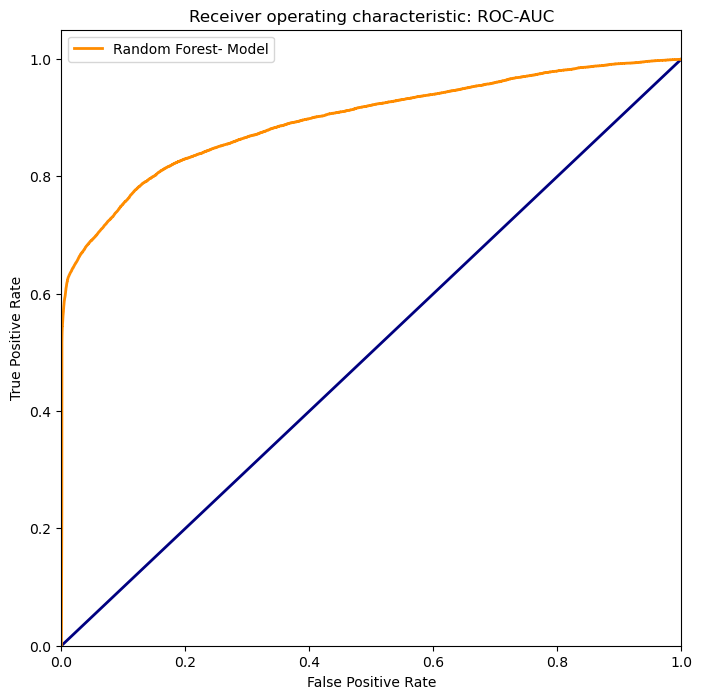

Computed Area Under the Curve (AUC) 0.895738766853086


In [44]:
fpr, tpr, thresholds = roc_curve(Y_test,model.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,8))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0,1],[0,1] ,color="navy",lw=2,label="")
plt.plot(fpr,tpr,color="darkorange",lw=2, label="Random Forest- Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic: ROC-AUC")
plt.legend()
plt.show()
print("Computed Area Under the Curve (AUC)",auc(fpr, tpr))

Decisin Tree

DecisionTree
Train Score: 1.0
Test Score: 0.9998894280176395
[[291208     15]
 [    19  16250]]


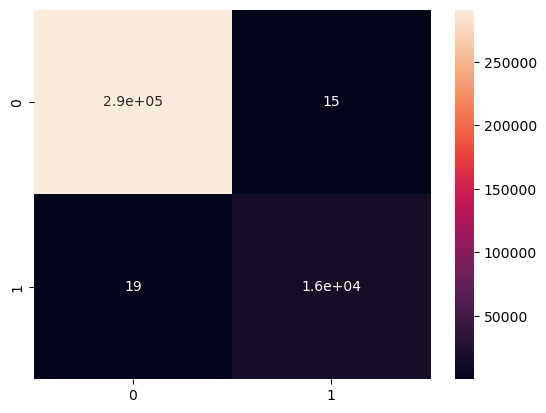

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    291223
           1       1.00      1.00      1.00     16269

    accuracy                           1.00    307492
   macro avg       1.00      1.00      1.00    307492
weighted avg       1.00      1.00      1.00    307492



In [45]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)
print("DecisionTree")
print("Train Score:",dt_model.score(X_train,Y_train))
print("Test Score:",dt_model.score(X_test,Y_test))

print(confusion_matrix(Y_test,dt_model.predict(X_test)))
sns.heatmap(confusion_matrix(Y_test,dt_model.predict(X_test)), annot=True)
plt.show()
print(classification_report(Y_test, dt_model.predict(X_test)))

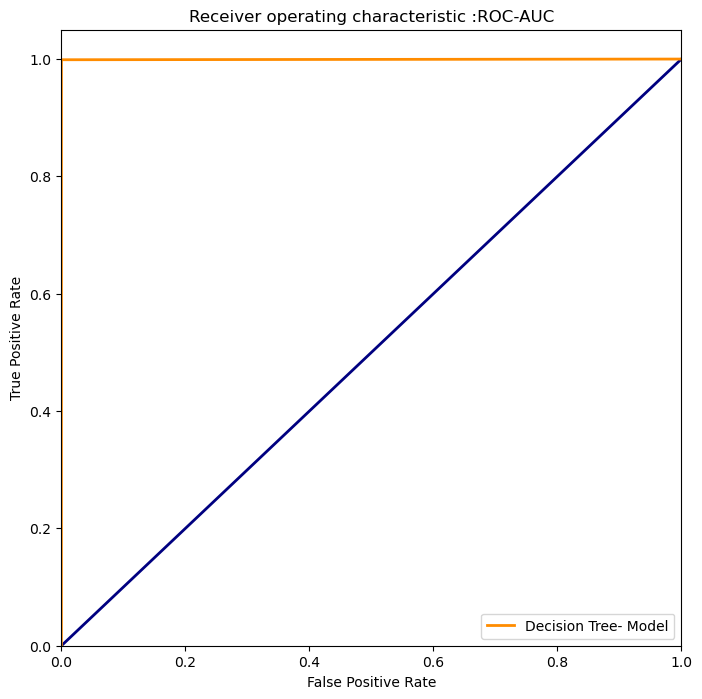

Computed Area Under the Curve (AUC) 0.9993903139069792


In [47]:
fpr,tpr, thresholds = roc_curve(Y_test,dt_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,8))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0,1],[0,1],color="navy",lw=2,label="")
plt.plot(fpr,tpr,color="darkorange",lw=2, label="Decision Tree- Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic :ROC-AUC")
plt.legend()
plt.show()
print("Computed Area Under the Curve (AUC)",auc(fpr, tpr))